In [18]:
#Começa aqui após ter os arquivos
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

In [19]:
#Shapefile baixado em: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html
'''
file_names = ["2023-Q1.parquet", "2023-Q2.parquet", "2023-Q3.parquet", "2023-Q4.parquet"]
def load_and_process_data(file_names):
    dfs = []
    for file_name in file_names:
        print(f'Carregando dados do arquivo: {file_name}')
        df = pd.read_parquet(file_name)
        df['geometry'] = df['tile'].apply(wkt.loads)
        df['quarter'] = file_name.split('-')[1]  # Assumindo que o nome do arquivo contém o trimestre
        dfs.append(df)
    
    combined_df = pd.concat(dfs, ignore_index=True, axis=0)
    return combined_df

df = load_and_process_data(file_names)
print(df)
Ficou muito pesado
'''
file_name = "2024-Q01.parquet"
df = pd.read_parquet(file_name)


df.rename(columns={'tile': 'geometry'}, inplace=True)

df['geometry'] = df['geometry'].apply(wkt.loads)

df_geo = gpd.GeoDataFrame(df, geometry='geometry')
df_geo.crs = "EPSG:4326"

df_geo.head()

,quadkey,geometry,tile_x,tile_y,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,tests,devices
0,0022133222312323,"POLYGON ((-160.02136 70.64359, -160.01587 70.6...",-160.0186,70.6427,64266,7578,165,469.0,341.0,2,1
1,0022133222330012,"POLYGON ((-160.03784 70.63995, -160.03235 70.6...",-160.0351,70.6390,158062,14698,223,402.0,204.0,1,1
2,0022133222330030,"POLYGON ((-160.03784 70.63813, -160.03235 70.6...",-160.0351,70.6372,126380,5043,97,254.0,212.0,3,2
3,0022133222330031,"POLYGON ((-160.03235 70.63813, -160.02686 70.6...",-160.0296,70.6372,87525,10572,86,337.0,165.0,3,3
4,0022133222330032,"POLYGON ((-160.03784 70.63631, -160.03235 70.6...",-160.0351,70.6354,58296,8058,101,944.0,246.0,13,4


In [20]:
#shapefile_sp = gpd.read_file('SP_Municipios_2022.zip') 
shapefile_sp = gpd.read_file('BR_Municipios_2022.zip') #Tentar rodar com brasil
distritos = shapefile_sp.to_crs(4326)
distritos.head()

nome_arquivo_excel = "distritos.xlsx"
distritos.to_excel(nome_arquivo_excel, index=False)
#print(f"Arquivo '{nome_arquivo_excel}' salvo com sucesso!")

In [21]:
# Realiza o join espacial
join_sp = gpd.sjoin(df_geo, distritos, how="inner", op='intersects')

join_sp.head()
# O resultado 'join_sp' conterá as velocidades de internet com a informação dos municípios de São Paulo

C:\Users\Jonatas\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,quadkey,geometry,tile_x,tile_y,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,tests,devices,index_right,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2
2367423,0322333231021013,"POLYGON ((-69.19739 0.60973, -69.19189 0.60973...",-69.1946,0.6070,11985,2871,714,2113.0,1132.0,3,1,125,1303809,São Gabriel da Cachoeira,AM,109192.562
2367424,0322333231021023,"POLYGON ((-69.20837 0.59874, -69.20288 0.59874...",-69.2056,0.5960,164285,37861,30,195.0,46.0,3,1,125,1303809,São Gabriel da Cachoeira,AM,109192.562
2367425,0322333231021033,"POLYGON ((-69.19739 0.59874, -69.19189 0.59874...",-69.1946,0.5960,136373,19492,67,353.0,145.0,7,1,125,1303809,São Gabriel da Cachoeira,AM,109192.562
2367426,0322333310000131,"POLYGON ((-68.16467 1.39513, -68.15918 1.39513...",-68.1619,1.3924,18104,8294,99,885.0,2654.0,1,1,125,1303809,São Gabriel da Cachoeira,AM,109192.562
2367427,0322333320221101,"POLYGON ((-68.83484 0.43945, -68.82935 0.43945...",-68.8321,0.4367,99288,36245,36,315.0,80.0,3,1,125,1303809,São Gabriel da Cachoeira,AM,109192.562


In [22]:
# Calcular a média de avg_d_kbps por município
#join_sp['avg_d_kbps'] = join_sp.groupby('NM_MUN')['avg_d_kbps'].transform('mean')

join_sp['avg_d_mbps'] = join_sp['avg_d_kbps'] / 1000

join_sp['avg_u_mbps'] = join_sp['avg_u_kbps'] / 1000

# Salvando o resultado em um arquivo Excel
nome_arquivo_excel = "informacoes_por_municipio.xlsx"
join_sp.to_excel(nome_arquivo_excel, index=False)
print(join_sp)

                  quadkey                                           geometry  \
2367423  0322333231021013  POLYGON ((-69.19739 0.60973, -69.19189 0.60973...   
2367424  0322333231021023  POLYGON ((-69.20837 0.59874, -69.20288 0.59874...   
2367425  0322333231021033  POLYGON ((-69.19739 0.59874, -69.19189 0.59874...   
2367426  0322333310000131  POLYGON ((-68.16467 1.39513, -68.15918 1.39513...   
2367427  0322333320221101  POLYGON ((-68.83484 0.43945, -68.82935 0.43945...   
...                   ...                                                ...   
6306396  2112001022013331  POLYGON ((-42.01721 -22.98874, -42.01172 -22.9...   
6306398  2112001022102022  POLYGON ((-42.01172 -22.97357, -42.00623 -22.9...   
6306399  2112001022102200  POLYGON ((-42.01172 -22.97862, -42.00623 -22.9...   
6306400  2112001022102202  POLYGON ((-42.01172 -22.98368, -42.00623 -22.9...   
6306401  2112001022102223  POLYGON ((-42.00623 -22.99379, -42.00073 -22.9...   

          tile_x   tile_y  avg_d_kbps  

In [23]:
df_idh = pd.read_excel('idh_municipios_ibge.xlsx')
df_idh.rename(columns={'Município [-]': 'Municipio'}, inplace=True)
df_idh.rename(columns={'Código [-]': 'Codigo_Municipio'}, inplace=True)
df_idh['Codigo_Municipio'] = df_idh['Codigo_Municipio'].astype(str)


In [24]:
print(df_idh.head())

      Municipio Codigo_Municipio      Gentílico [-]  \
0    Acrelândia          1200013       acrelandense   
1  Assis Brasil          1200054  assis-brasiliense   
2     Brasiléia          1200104        brasileense   
3        Bujari          1200138         bujariense   
4      Capixaba          1200179        capixabense   

                  Prefeito [2021]  Área Territorial - km² [2022]  \
0     OLAVO FRANCELINO DE REZENDE                       1811.613   
1           JERRY CORREIA MARINHO                       4979.073   
2  FERNANDA DE SOUZA HASSEM CESAR                       3928.174   
3      JOÃO EDVALDO TELES DE LIMA                       3034.869   
4             MANOEL MAIA BEZERRA                       1705.824   

   População residente - pessoas [2022]  \
0                                 14021   
1                                  8100   
2                                 26000   
3                                 12917   
4                                 10392   

 

In [25]:
print(join_sp.head())

                  quadkey                                           geometry  \
2367423  0322333231021013  POLYGON ((-69.19739 0.60973, -69.19189 0.60973...   
2367424  0322333231021023  POLYGON ((-69.20837 0.59874, -69.20288 0.59874...   
2367425  0322333231021033  POLYGON ((-69.19739 0.59874, -69.19189 0.59874...   
2367426  0322333310000131  POLYGON ((-68.16467 1.39513, -68.15918 1.39513...   
2367427  0322333320221101  POLYGON ((-68.83484 0.43945, -68.82935 0.43945...   

          tile_x  tile_y  avg_d_kbps  avg_u_kbps  avg_lat_ms  avg_lat_down_ms  \
2367423 -69.1946  0.6070       11985        2871         714           2113.0   
2367424 -69.2056  0.5960      164285       37861          30            195.0   
2367425 -69.1946  0.5960      136373       19492          67            353.0   
2367426 -68.1619  1.3924       18104        8294          99            885.0   
2367427 -68.8321  0.4367       99288       36245          36            315.0   

         avg_lat_up_ms  tests  d

In [26]:
# Realiza o join dos DataFrames
# Ajuste 'left_on' para 'CD_MUN' em join_sp e 'right_on' para 'Codigo_Municipio' em df_idh
join_municipios = pd.merge(join_sp, df_idh, left_on='CD_MUN', right_on='Codigo_Municipio', how='left')

# Mostra as primeiras linhas do DataFrame resultante para verificar a união
print(join_municipios.head())

# Salvando o DataFrame resultante em um arquivo Excel
nome_arquivo_excel_final = "dados_completos_por_municipio.xlsx"
join_municipios.to_excel(nome_arquivo_excel_final, index=False)
print(f"Arquivo '{nome_arquivo_excel_final}' salvo com sucesso!")

            quadkey                                           geometry  \
0  0322333231021013  POLYGON ((-69.19739 0.60973, -69.19189 0.60973...   
1  0322333231021023  POLYGON ((-69.20837 0.59874, -69.20288 0.59874...   
2  0322333231021033  POLYGON ((-69.19739 0.59874, -69.19189 0.59874...   
3  0322333310000131  POLYGON ((-68.16467 1.39513, -68.15918 1.39513...   
4  0322333320221101  POLYGON ((-68.83484 0.43945, -68.82935 0.43945...   

    tile_x  tile_y  avg_d_kbps  avg_u_kbps  avg_lat_ms  avg_lat_down_ms  \
0 -69.1946  0.6070       11985        2871         714           2113.0   
1 -69.2056  0.5960      164285       37861          30            195.0   
2 -69.1946  0.5960      136373       19492          67            353.0   
3 -68.1619  1.3924       18104        8294          99            885.0   
4 -68.8321  0.4367       99288       36245          36            315.0   

   avg_lat_up_ms  tests  ...  \
0         1132.0      3  ...   
1           46.0      3  ...   
2       

In [27]:
# Seleciona as colunas desejadas para o novo DataFrame
wanted_columns = ['NM_MUN','SIGLA_UF', 'AREA_KM2', 'avg_d_mbps', 'avg_u_mbps', 'devices', 'tests', 'avg_lat_down_ms', 'avg_lat_up_ms', 'População residente - pessoas [2022]', 'Densidade demográfica - hab/km² [2022]', 'Escolarização <span>6 a 14 anos</span> - % [2010]','IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]','Mortalidade infantil - óbitos por mil nascidos vivos [2022]','Receitas realizadas - R$ (×1000) [2017]']
municipios = join_municipios[wanted_columns].copy()

# Converte colunas específicas para numérico, tratando valores inválidos
municipios['Escolarização <span>6 a 14 anos</span> - % [2010]'] = pd.to_numeric(municipios['Escolarização <span>6 a 14 anos</span> - % [2010]'], errors='coerce')
municipios['Receitas realizadas - R$ (×1000) [2017]'] = pd.to_numeric(municipios['Receitas realizadas - R$ (×1000) [2017]'], errors='coerce')
municipios['Mortalidade infantil - óbitos por mil nascidos vivos [2022]'] = pd.to_numeric(municipios['Mortalidade infantil - óbitos por mil nascidos vivos [2022]'], errors='coerce')
municipios['IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]'] = pd.to_numeric(municipios['IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]'], errors='coerce')

In [28]:
print(municipios.dtypes)

NM_MUN                                                                  object
SIGLA_UF                                                                object
AREA_KM2                                                               float64
avg_d_mbps                                                             float64
avg_u_mbps                                                             float64
devices                                                                  int64
tests                                                                    int64
avg_lat_down_ms                                                        float64
avg_lat_up_ms                                                          float64
População residente - pessoas [2022]                                   float64
Densidade demográfica - hab/km² [2022]                                 float64
Escolarização <span>6 a 14 anos</span> - % [2010]                      float64
IDHM <span>Índice de desenvolvimento humano municipa

In [29]:
# Agrupa pelo nome do município e pela sigla da UF, realizando a agregação necessária
municipios = municipios.groupby(['NM_MUN', 'SIGLA_UF']).agg({
    'AREA_KM2': 'max',
    'avg_d_mbps': 'mean',
    'avg_u_mbps': 'mean',
    'avg_lat_down_ms': 'mean',
    'avg_lat_up_ms': 'mean',
    'devices': 'sum',
    'tests': 'sum',
    'População residente - pessoas [2022]': 'max',
    'Densidade demográfica - hab/km² [2022]': 'max',
    'Escolarização <span>6 a 14 anos</span> - % [2010]': 'max',
    'IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]': 'max',
    'Mortalidade infantil - óbitos por mil nascidos vivos [2022]': 'max',
    'Receitas realizadas - R$ (×1000) [2017]': 'max'

}).reset_index()

print(municipios)

                   NM_MUN SIGLA_UF   AREA_KM2  avg_d_mbps  avg_u_mbps  \
0         Abadia de Goiás       GO    143.357  164.816151  110.128205   
1     Abadia dos Dourados       MG    880.461   33.753898   24.171184   
2               Abadiânia       GO   1044.555   85.060455   50.847432   
3              Abaetetuba       PA   1610.654   67.242459   62.190494   
4                  Abaeté       MG   1817.067  101.283667   57.812314   
...                   ...      ...        ...         ...         ...   
5549                Áurea       RS    156.727   57.283938   66.121250   
5550               Ângulo       PR    106.021   88.431773   84.677227   
5551        Érico Cardoso       BA    735.249   53.192468   47.400809   
5552               Óbidos       PA  28011.041   40.396641   27.778063   
5553                 Óleo       SP    198.938  125.738400  137.070000   

      avg_lat_down_ms  avg_lat_up_ms  devices  tests  \
0          266.328767     306.109589      182    607   
1          

In [30]:
# Renomeia as colunas para nomes mais amigáveis
municipios = municipios.rename(columns={
    'NM_MUN': 'Município',
    'SIGLA_UF': 'UF',
    'AREA_KM2': 'Área (km²)',
    'avg_d_mbps': 'Velocidade Média Download (Mbps)',
    'avg_u_mbps': 'Velocidade Média Upload (Mbps)',
    'devices': 'Número de Dispositivos',
    'tests': 'Número de Testes',
    'avg_lat_down_ms': 'Latência Média Download (ms)',
    'avg_lat_up_ms': 'Latência Média Upload (ms)',
    'População residente - pessoas [2022]': 'População Residente (2022)',
    'Densidade demográfica - hab/km² [2022]': 'Densidade Demográfica (hab/km²) (2022)',
    'Escolarização <span>6 a 14 anos</span> - % [2010]': 'Escolarização (6 a 14 anos) (%) (2010)',
    'IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]': 'IDHM (2010)',
    'Mortalidade infantil - óbitos por mil nascidos vivos [2022]': 'Mortalidade Infantil (óbitos por mil nascidos vivos) (2022)',
    'Receitas realizadas - R$ (×1000) [2017]': 'Receitas Realizadas (R$ mil) (2017)'
})

In [31]:
def plot(df, dfxlabel, dfylabel, dftitle, limit):
    # Ordena os dados e limita ao número de elementos especificado
    df = df.nlargest(limit, dfylabel)
    
    x = df[dfxlabel].values
    y = df[dfylabel].values
    
    plt.figure(figsize=(50, 7))
    sns.set_style('darkgrid')
    plt.xlabel("", fontsize=22)
    plt.ylabel("", fontsize=22)
    plt.title(dftitle, fontsize=34)
    plt.ylim(min(y) - 5, max(y) + 5)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    # Create the barplot and get the plot object
    barplot = sns.barplot(x=x, y=y, color='MediumSeaGreen')

    # Get the x-axis labels from the plot object
    x_labels = barplot.get_xticklabels()

    # Set the x-ticks using FixedLocator
    barplot.xaxis.set_major_locator(FixedLocator(range(len(x_labels))))

    # Show the values for each bar
    for index, value in enumerate(y):
        plt.text(index, value - 0.05, str(round(value, 2)), color='black', ha="center", fontsize=22)  # Ajusta o tamanho do texto dos valores


    # Set the x-axis labels on the plot object
    lenght = 30
    barplot.set_xticklabels([label.get_text()[:lenght] + '...' if len(label.get_text()) > lenght else label.get_text() for label in x_labels], fontsize=22)  # Ajusta o tamanho do texto das unidades federativas
    
    plt.show()

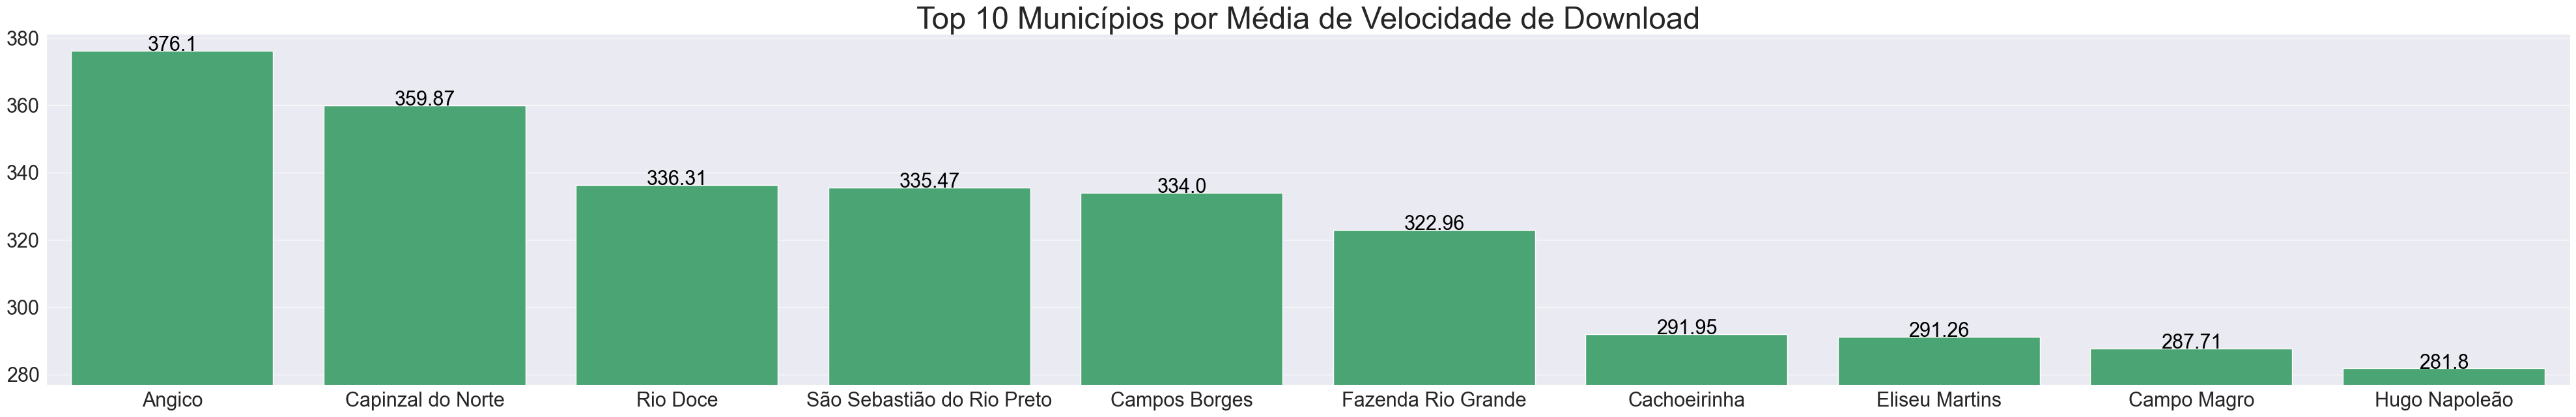

In [32]:
plot(municipios, 'Município', 'Velocidade Média Download (Mbps)', 'Top 10 Municípios por Média de Velocidade de Download', 10)

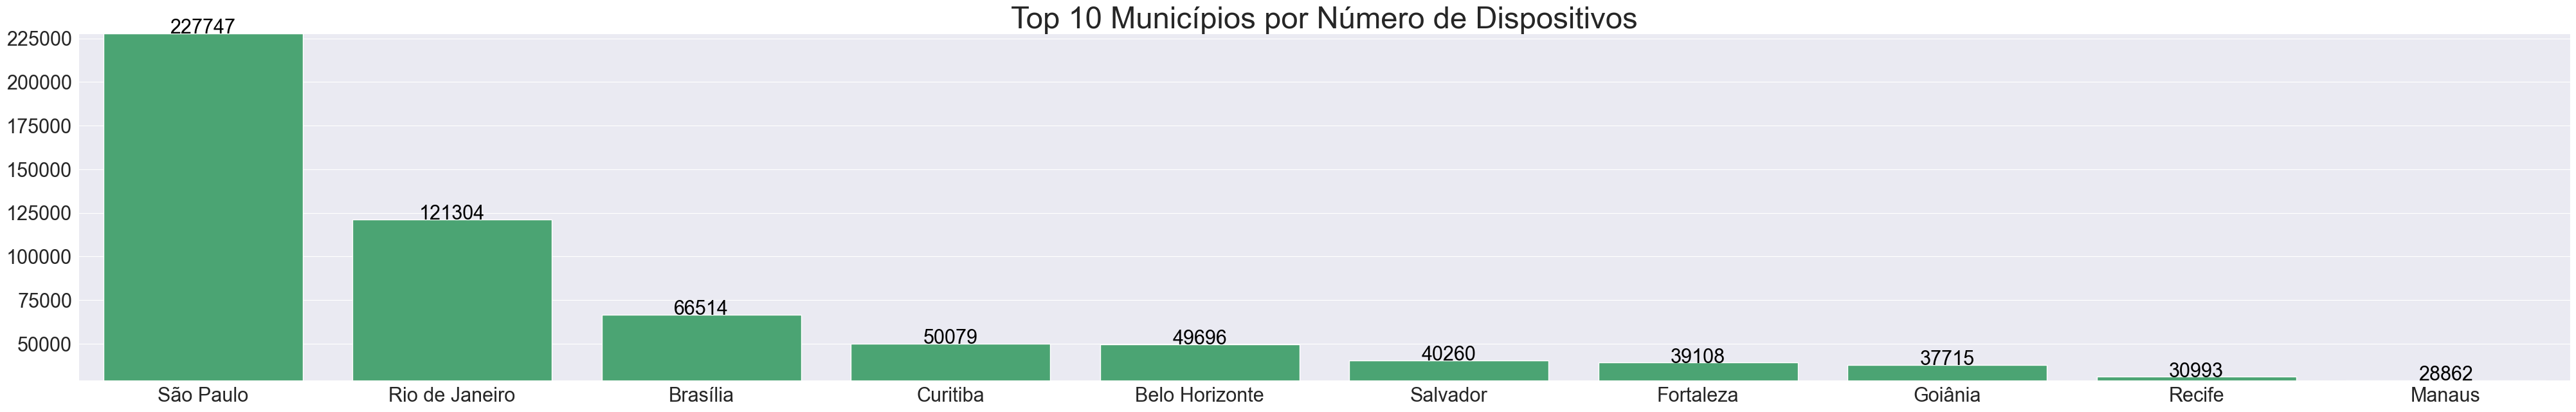

In [33]:
# Top 10 municípios por número de dispositivos (Número de Dispositivos)
plot(municipios, 'Município', 'Número de Dispositivos', 'Top 10 Municípios por Número de Dispositivos', 10)

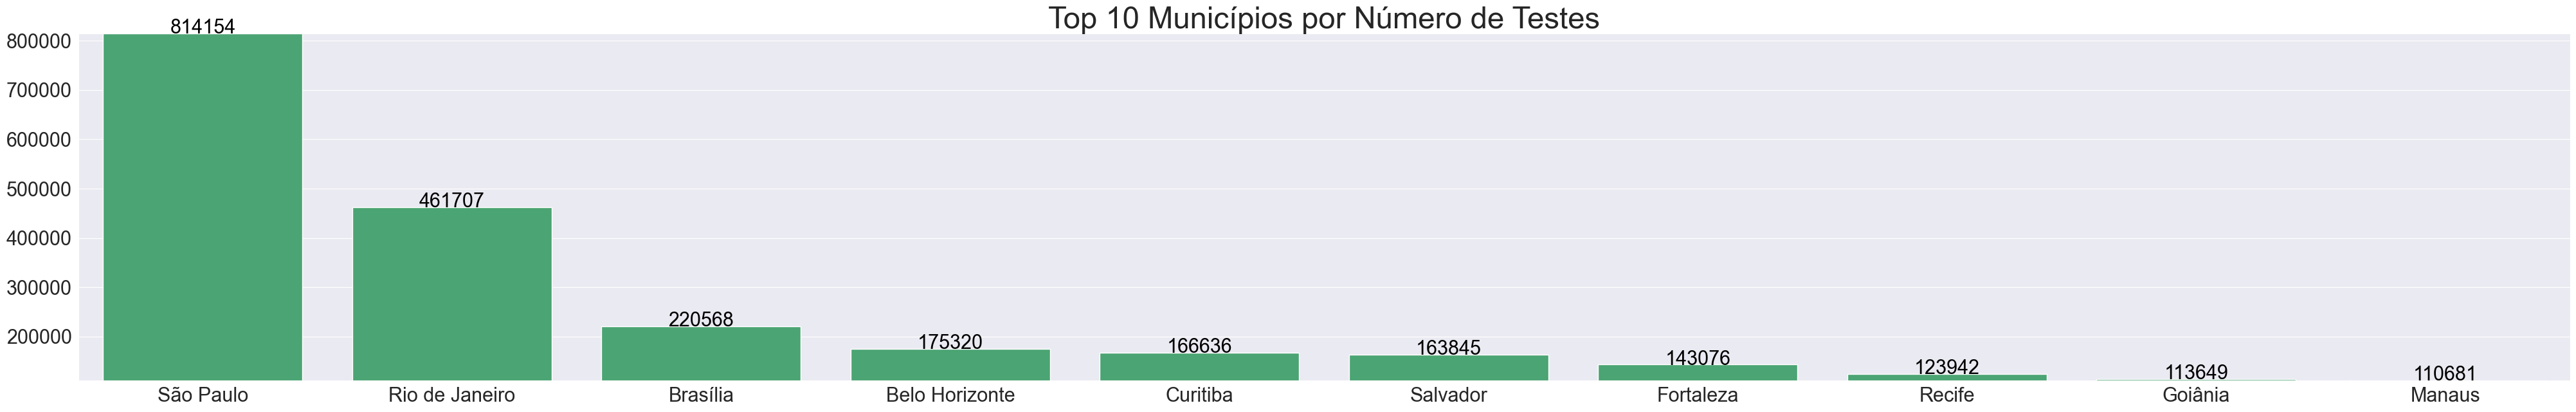

In [34]:
# Top 10 municípios por número de testes (Número de Testes)
plot(municipios, 'Município', 'Número de Testes', 'Top 10 Municípios por Número de Testes', 10)

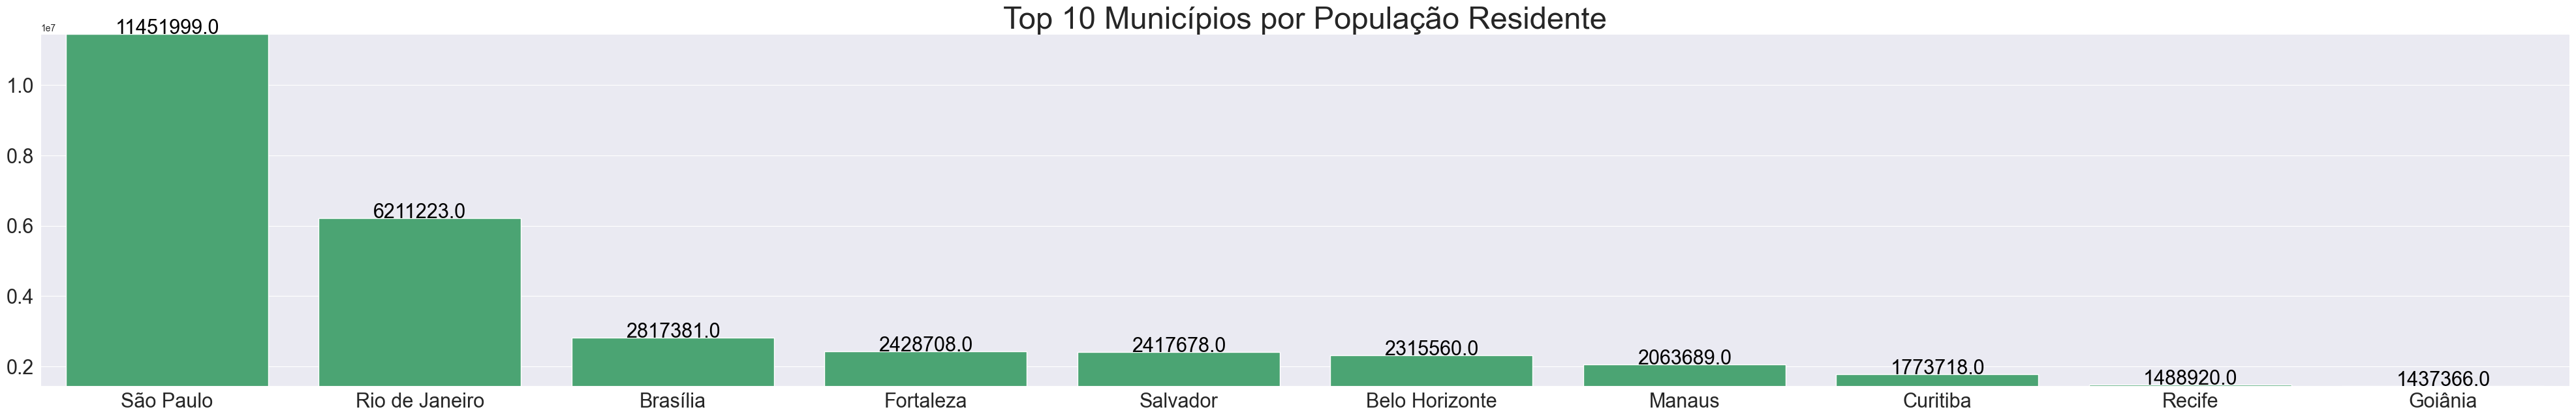

In [35]:

# Top 10 municípios por população residente (População Residente (2022))
plot(municipios, 'Município', 'População Residente (2022)', 'Top 10 Municípios por População Residente', 10)

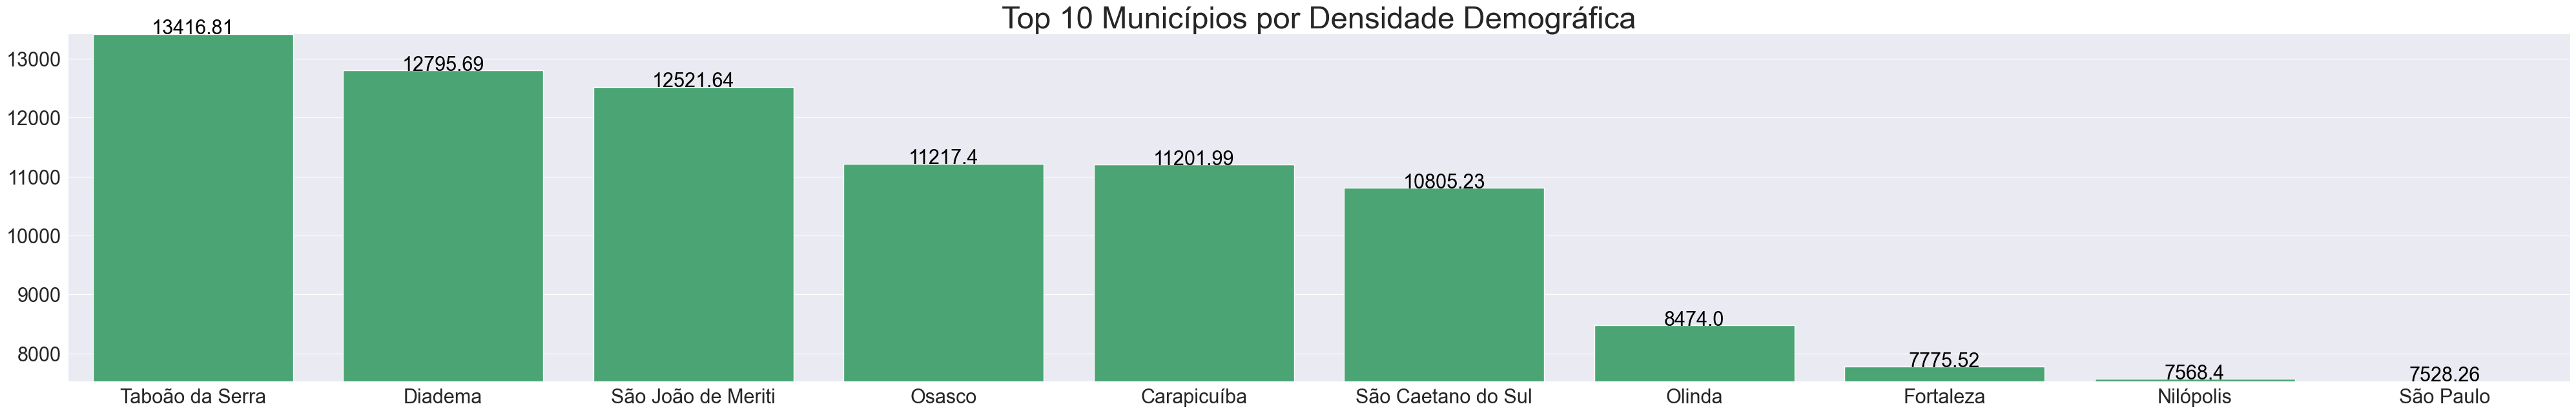

In [36]:
# Top 10 municípios por densidade demográfica (Densidade Demográfica (hab/km²) (2022))
plot(municipios, 'Município', 'Densidade Demográfica (hab/km²) (2022)', 'Top 10 Municípios por Densidade Demográfica', 10)

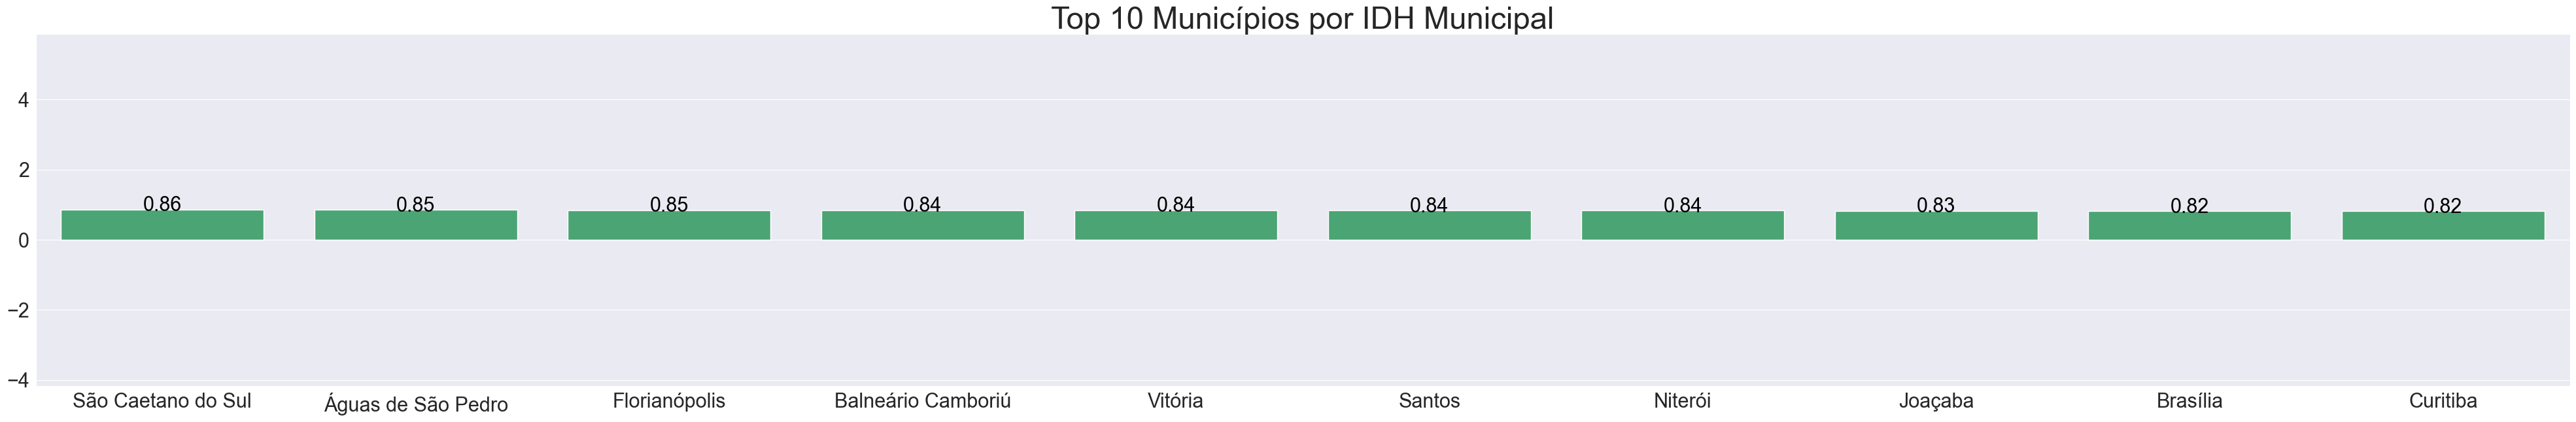

In [37]:
# Top 10 municípios por índice de desenvolvimento humano (IDHM (2010))
plot(municipios, 'Município', 'IDHM (2010)', 'Top 10 Municípios por IDH Municipal', 10)

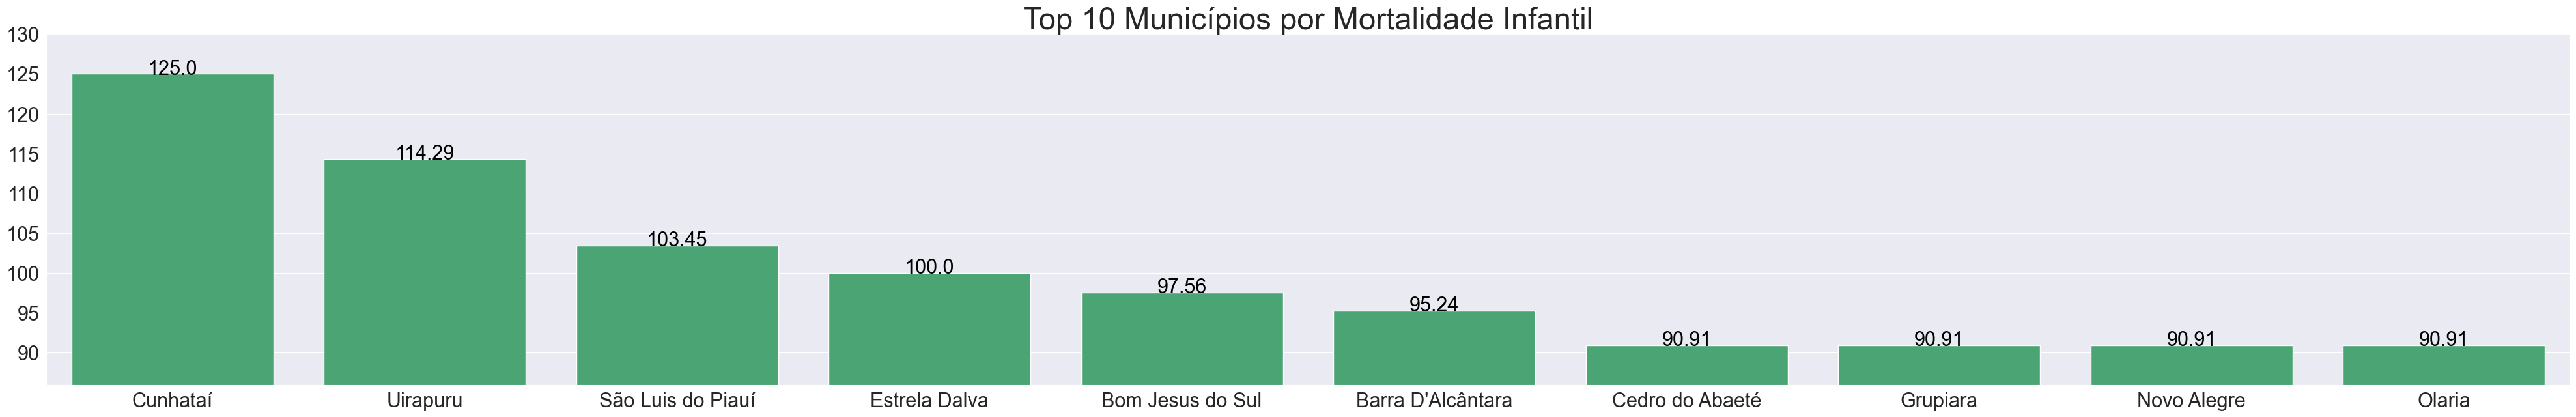

In [38]:
# Top 10 municípios por mortalidade infantil (Mortalidade Infantil (óbitos por mil nascidos vivos) (2022))
plot(municipios, 'Município', 'Mortalidade Infantil (óbitos por mil nascidos vivos) (2022)', 'Top 10 Municípios por Mortalidade Infantil', 10)

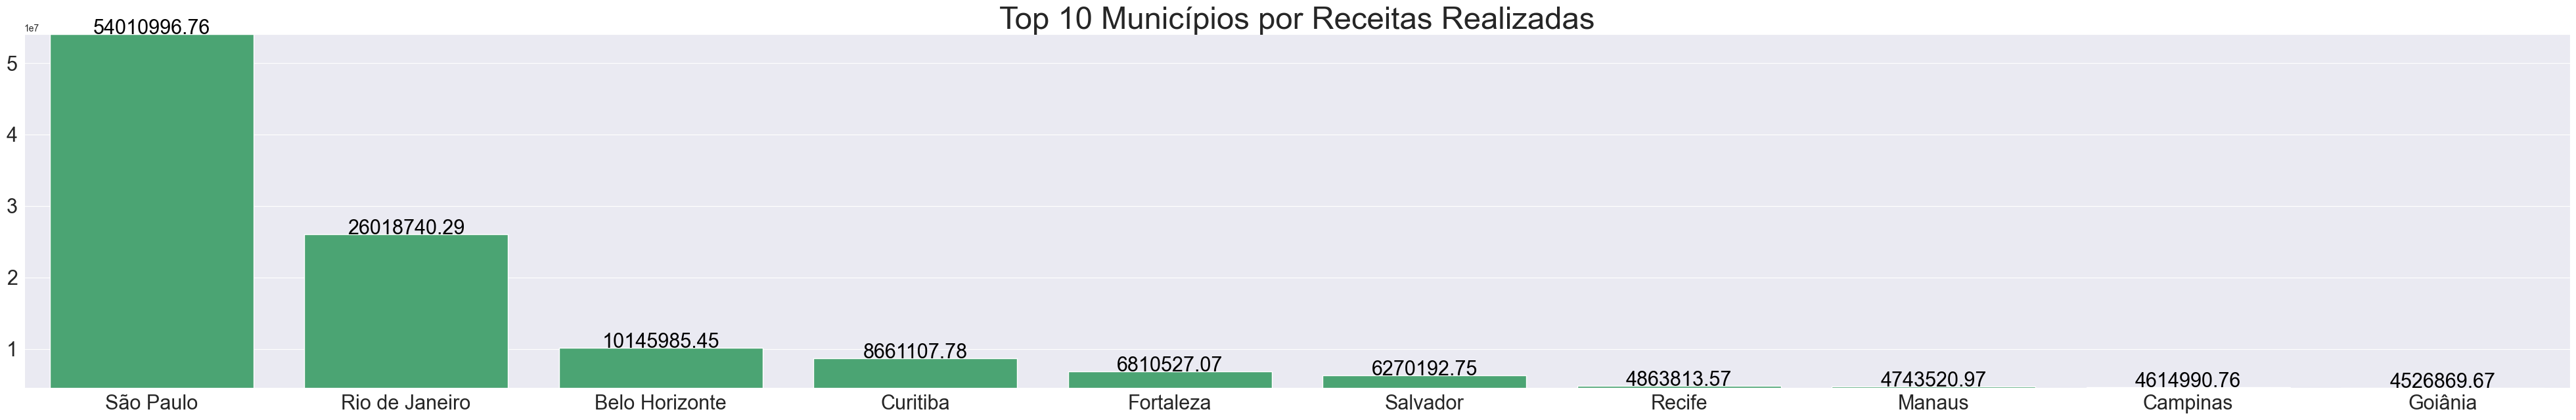

In [39]:
# Top 10 municípios por receitas realizadas (Receitas Realizadas (R$ mil) (2017))
plot(municipios, 'Município', 'Receitas Realizadas (R$ mil) (2017)', 'Top 10 Municípios por Receitas Realizadas', 10)


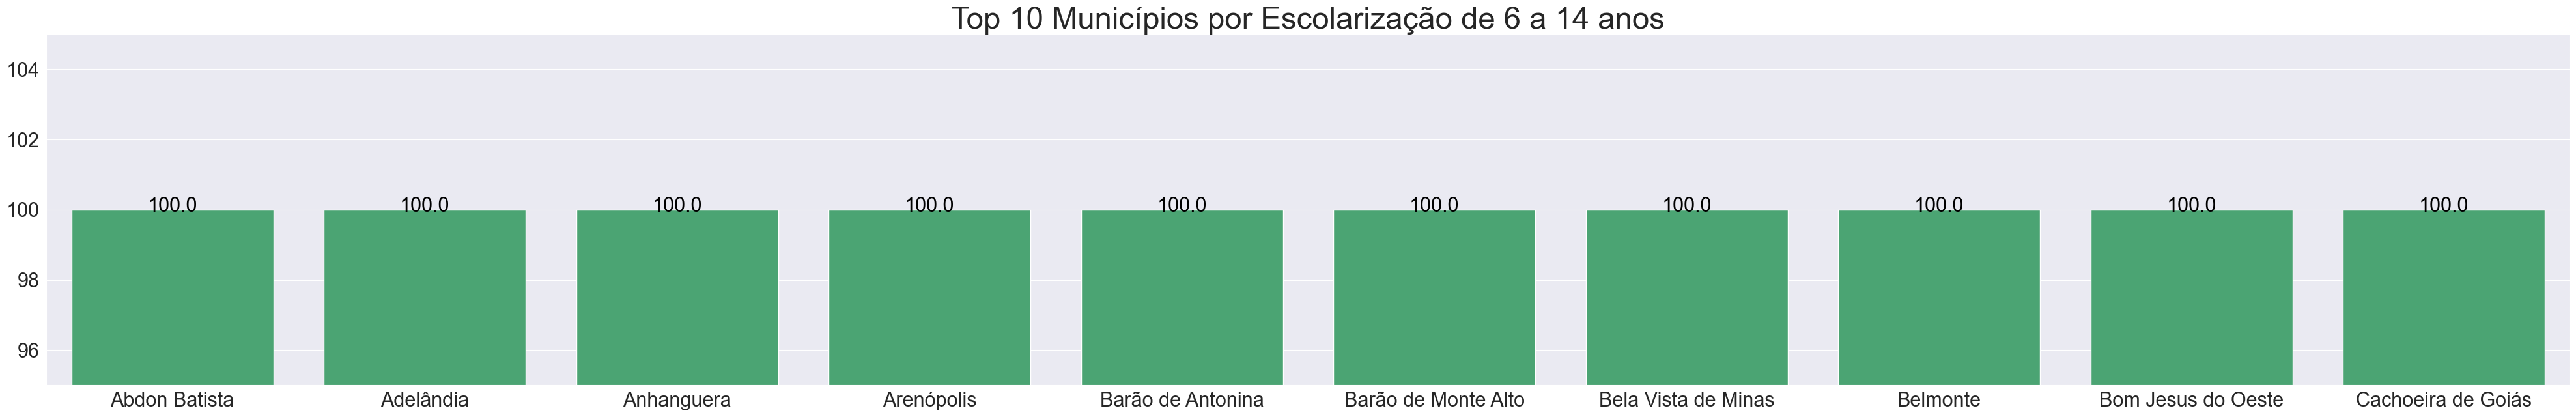

In [40]:
# Top 10 municípios por escolarização de 6 a 14 anos (Escolarização (6 a 14 anos) (%) (2010))
plot(municipios, 'Município', 'Escolarização (6 a 14 anos) (%) (2010)', 'Top 10 Municípios por Escolarização de 6 a 14 anos', 10)

In [41]:
#Código antigo
'''
# Seleciona as colunas desejadas para o novo DataFrame
wanted_columns = ['SIGLA_UF', 'avg_d_mbps', 'avg_u_mbps']
uf_data = join_municipios[wanted_columns]

# Agrupa pelo sigla da UF, somando as velocidades de download e upload
uf_summary = uf_data.groupby('SIGLA_UF').agg({
    'avg_d_mbps': 'mean',
    'avg_u_mbps': 'mean'
}).reset_index()

print(uf_summary)

# Plot para municípios (média das velocidades)
plot(municipios, 'NM_MUN', 'avg_d_mbps', 'Média de Velocidade de Download por Município') São + 5000 - pensar em uma maneira de visualizar
plot(municipios, 'NM_MUN', 'avg_u_mbps', 'Média de Velocidade de Upload por Município') 

# Plot para unidades federativas (soma das velocidades)
plot(uf_summary, 'SIGLA_UF', 'avg_d_mbps', 'Média das Velocidades de Download por UF', 15)
plot(uf_summary, 'SIGLA_UF', 'avg_u_mbps', 'Média das Velocidades de Upload por UF', 15)
'''

"\n\n# Seleciona as colunas desejadas para o novo DataFrame\nwanted_columns = ['SIGLA_UF', 'avg_d_mbps', 'avg_u_mbps']\nuf_data = join_municipios[wanted_columns]\n\n# Agrupa pelo sigla da UF, somando as velocidades de download e upload\nuf_summary = uf_data.groupby('SIGLA_UF').agg({\n    'avg_d_mbps': 'mean',\n    'avg_u_mbps': 'mean'\n}).reset_index()\n\nprint(uf_summary)\n\n# Plot para municípios (média das velocidades)\nplot(municipios, 'NM_MUN', 'avg_d_mbps', 'Média de Velocidade de Download por Município') São + 5000 - pensar em uma maneira de visualizar\nplot(municipios, 'NM_MUN', 'avg_u_mbps', 'Média de Velocidade de Upload por Município') \n\n# Plot para unidades federativas (soma das velocidades)\nplot(uf_summary, 'SIGLA_UF', 'avg_d_mbps', 'Média das Velocidades de Download por UF', 15)\nplot(uf_summary, 'SIGLA_UF', 'avg_u_mbps', 'Média das Velocidades de Upload por UF', 15)\n"